<ipython-input-5-158428a703c7>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sequences)


Streaming output truncated to the last 5000 lines.
Epoch 2503/5000
8/8 [==============================] - 0s 17ms/step - loss: 7.8897e-06 - val_loss: 7.7910e-06
Epoch 2504/5000
8/8 [==============================] - 0s 16ms/step - loss: 7.8206e-06 - val_loss: 8.8256e-06
Epoch 2505/5000
8/8 [==============================] - 0s 17ms/step - loss: 8.2627e-06 - val_loss: 7.7881e-06
Epoch 2506/5000
8/8 [==============================] - 0s 17ms/step - loss: 7.7284e-06 - val_loss: 7.6321e-06
Epoch 2507/5000
8/8 [==============================] - 0s 16ms/step - loss: 7.8366e-06 - val_loss: 7.7575e-06
Epoch 2508/5000
8/8 [==============================] - 0s 16ms/step - loss: 7.5196e-06 - val_loss: 8.8083e-06
Epoch 2509/5000
8/8 [==============================] - 0s 17ms/step - loss: 8.1608e-06 - val_loss: 8.3520e-06
Epoch 2510/5000
8/8 [==============================] - 0s 17ms/step - loss: 7.9188e-06 - val_loss: 8.2825e-06
Epoch 2511/5000
8/8 [==============================] - 0s 19ms/step -

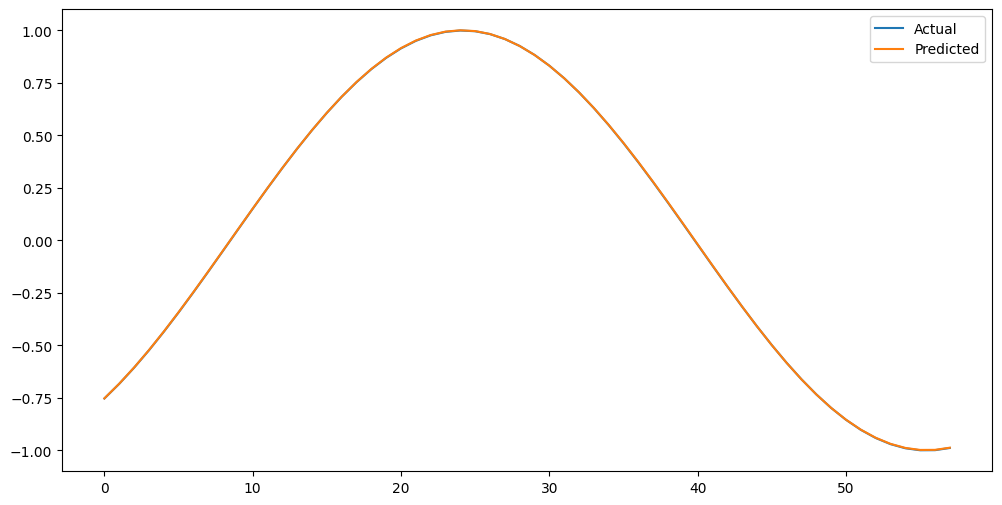

In [5]:
# @title
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Generate a simple time series dataset
def generate_time_series():
    t = np.linspace(0, 30, 300)
    x = np.sin(t)
    return x

# Create a function to create sequences from the time series data
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append((sequence, target))
    return np.array(sequences)

# Generate and preprocess the data
time_series_data = generate_time_series()
sequence_length = 10
sequences = create_sequences(time_series_data, sequence_length)

# Find the maximum sequence length
max_sequence_length = max(len(sequence) for sequence, _ in sequences)

# Pad sequences to the maximum sequence length
sequences = [(np.pad(sequence, (0, max_sequence_length - len(sequence)), 'constant'), target) for sequence, target in sequences]

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(sequences))
train_data = sequences[:split_index]
test_data = sequences[split_index:]

X_train, y_train = np.array([sequence for sequence, _ in train_data]), np.array([target for _, target in train_data])
X_test, y_test = np.array([sequence for sequence, _ in test_data]), np.array([target for _, target in test_data])

# Reshape the data for LSTM
X_train = X_train.reshape(-1, max_sequence_length, 1)
X_test = X_test.reshape(-1, max_sequence_length, 1)

# Build an LSTM model
model = Sequential([
    LSTM(2, activation='relu', input_shape=(max_sequence_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5000, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()
